In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOAD DATA -----# provided dataset only has Total Population data, downloded males and females population data from data.worldbank.org for visualising the distribution of genders in population.
total_pop = pd.read_csv(r"C:\Data_Science\Prodigy_Tasks\data-science-datasets\Task 1\API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv", skiprows=4)
male_pop = pd.read_csv(r"C:\Users\Spring 2\Downloads\API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_32880\API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_32880.csv", skiprows=4)
female_pop = pd.read_csv(r"C:\Users\Spring 2\Downloads\API_SP.POP.TOTL.FE.IN_DS2_en_csv_v2_22961\API_SP.POP.TOTL.FE.IN_DS2_en_csv_v2_22961.csv", skiprows=4)


In [3]:
# FUNCTION TO CLEAN DATA 
def clean_population_df(df):
    # Remove 'Unnamed' columns
    df = df.copy()
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

    # Identify year columns
    year_cols = [col for col in df.columns if col.isdigit()]

    # Convert to numeric
    df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

    # Interpolate missing values across years
    df[year_cols] = df[year_cols].interpolate(axis=1, limit_direction='both')

    return df

In [4]:
total_pop = clean_population_df(total_pop)
male_pop = clean_population_df(male_pop)
female_pop = clean_population_df(female_pop)

In [5]:
# MERGE ALL DATA 
merged_df = total_pop[['Country Name', 'Country Code'] + [col for col in total_pop.columns if col.isdigit()]].rename(columns={col: f"Total_{col}" for col in total_pop.columns if col.isdigit()})
merged_df = merged_df.merge(male_pop[['Country Name', 'Country Code'] + [col for col in male_pop.columns if col.isdigit()]].rename(columns={col: f"Male_{col}" for col in male_pop.columns if col.isdigit()}), on=['Country Name', 'Country Code'], how='inner')
merged_df = merged_df.merge(female_pop[['Country Name', 'Country Code'] + [col for col in female_pop.columns if col.isdigit()]].rename(columns={col: f"Female_{col}" for col in female_pop.columns if col.isdigit()}), on=['Country Name', 'Country Code'], how='inner')

In [6]:
# EXPLORATORY DATA ANALYSIS(EDA)
merged_df.head()

,Country Name,Country Code,Total_1960,Total_1961,Total_1962,Total_1963,Total_1964,Total_1965,Total_1966,Total_1967,...,Female_2015,Female_2016,Female_2017,Female_2018,Female_2019,Female_2020,Female_2021,Female_2022,Female_2023,Female_2024
0,Aruba,ABW,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,58694.0,58990.0,...,56721.0,57213.0,57275.0,57429.0,57655.0,57382.0,56900.0,56652.0,56653.0,56784.0
1,Africa Eastern and Southern,AFE,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,153281203.0,157704381.0,...,306996430.0,315139785.0,323559276.0,332453754.0,341569862.0,350869705.0,360249371.0,369655503.0,379025748.0,388462057.0
2,Afghanistan,AFG,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,10266395.0,10505959.0,...,16732244.0,17159297.0,17649936.0,18178417.0,18736474.0,19343529.0,19813956.0,20103167.0,20530683.0,21114952.0
3,Africa Western and Central,AFW,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,111246953.0,113795019.0,...,207934891.0,213499543.0,219113878.0,224672701.0,230166416.0,235687925.0,241282911.0,246948301.0,252899429.0,259011880.0
4,Angola,AGO,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,5581386.0,5641807.0,...,14252582.0,14767682.0,15295911.0,15829364.0,16370876.0,16911493.0,17455057.0,18008613.0,18568216.0,19138383.0


In [7]:
merged_df.shape

(266, 197)

In [8]:
merged_df.duplicated().sum()

0

In [9]:
merged_df.isna().sum()

Country Name    0
Country Code    0
Total_1960      1
Total_1961      1
Total_1962      1
               ..
Female_2020     1
Female_2021     1
Female_2022     1
Female_2023     1
Female_2024     1
Length: 197, dtype: int64

In [10]:
# FUNCTION TO PLOT HISTOGRAM
def plot_histogram(data, column, title, xlabel):
    custom_palette = [
        '#1f77b4', '#2ca02c', '#17becf', '#9467bd', '#8c564b',
          '#e377c2', '#bcbd22', '#7f7f7f', '#ff7f0e', '#d62728'
    ]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Country Name")
    plt.tight_layout()
    plt.show()

In [11]:
# FUNCTION TO CALCULATE TOP GROWTH %
def calculate_growth(df, col_1960, col_2024):
    df['Growth (%)'] = ((df[col_2024] - df[col_1960]) / df[col_1960]) * 100
    return df

In [12]:
# CALCULATE GROWTH %
total_pop_growth = calculate_growth(total_pop, '1960', '2024')
male_pop_growth = calculate_growth(male_pop, '1960', '2024')
female_pop_growth = calculate_growth(female_pop, '1960', '2024')

In [13]:
# FUNCTION TO PLOT TOP GROWTH %
def plot_top_growth(df, label):
    top_growth = df.sort_values(by='Growth (%)', ascending=False).head(10)
    plt.figure(figsize=(8, 5))
    bars = plt.barh(top_growth['Country Name'], top_growth['Growth (%)'], color='mediumseagreen')
    plt.gca().invert_yaxis()
    plt.title(f"Top 10 Countries by {label} Growth (1960–2024)")
    plt.xlabel('Growth (%)')

    for bar, value in zip(bars, top_growth['Growth (%)']):
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
                 f"{value:.1f}%", va='center')

    plt.show()

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_17036\909171416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)


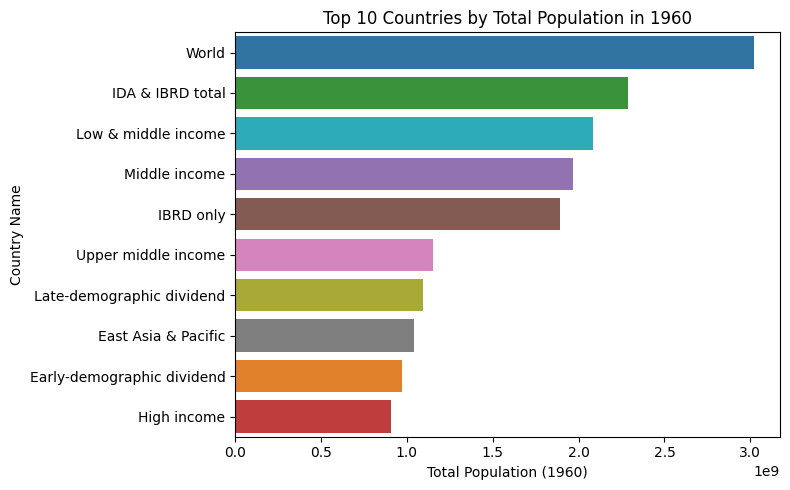

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_17036\909171416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)


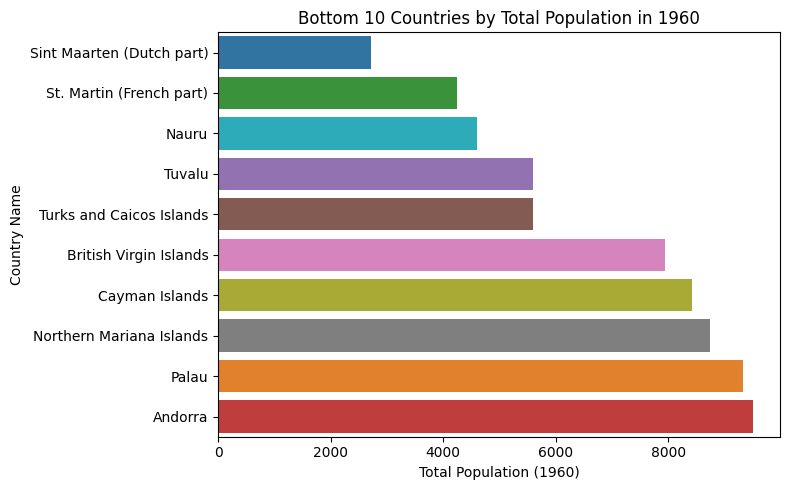

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_17036\909171416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)


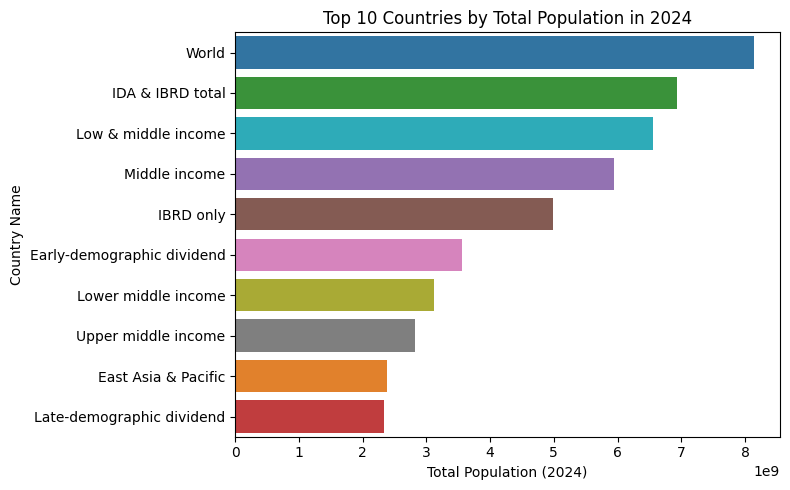

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_17036\909171416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)


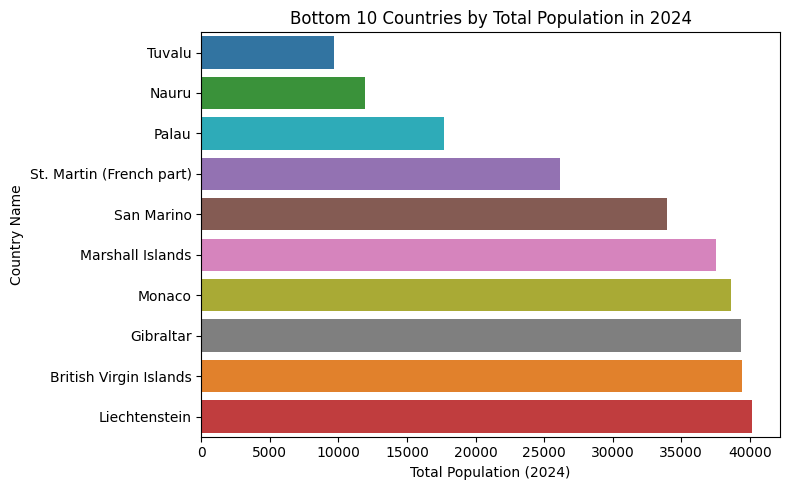

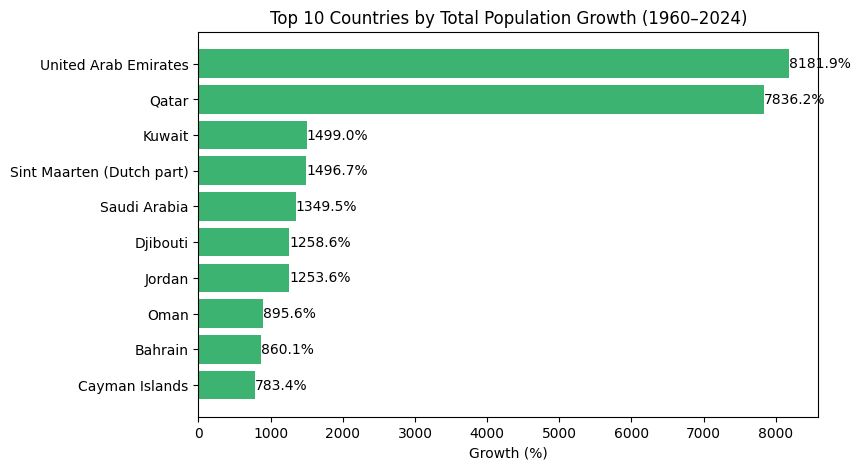

In [14]:
# TOTAL POPULATION PLOTS
top10_total_1960 = merged_df[['Country Name', 'Total_1960']].dropna().sort_values(by='Total_1960', ascending=False).head(10)
bottom10_total_1960 = merged_df[['Country Name', 'Total_1960']].dropna().sort_values(by='Total_1960', ascending=True).head(10)
top10_total_2024 = merged_df[['Country Name', 'Total_2024']].dropna().sort_values(by='Total_2024', ascending=False).head(10)
bottom10_total_2024 = merged_df[['Country Name', 'Total_2024']].dropna().sort_values(by='Total_2024', ascending=True).head(10)

plot_histogram(top10_total_1960, "Total_1960", "Top 10 Countries by Total Population in 1960", "Total Population (1960)")
plot_histogram(bottom10_total_1960, "Total_1960", "Bottom 10 Countries by Total Population in 1960", "Total Population (1960)")
plot_histogram(top10_total_2024, "Total_2024", "Top 10 Countries by Total Population in 2024", "Total Population (2024)")
plot_histogram(bottom10_total_2024, "Total_2024", "Bottom 10 Countries by Total Population in 2024", "Total Population (2024)")
plot_top_growth(total_pop_growth, 'Total Population')

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_17036\909171416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)


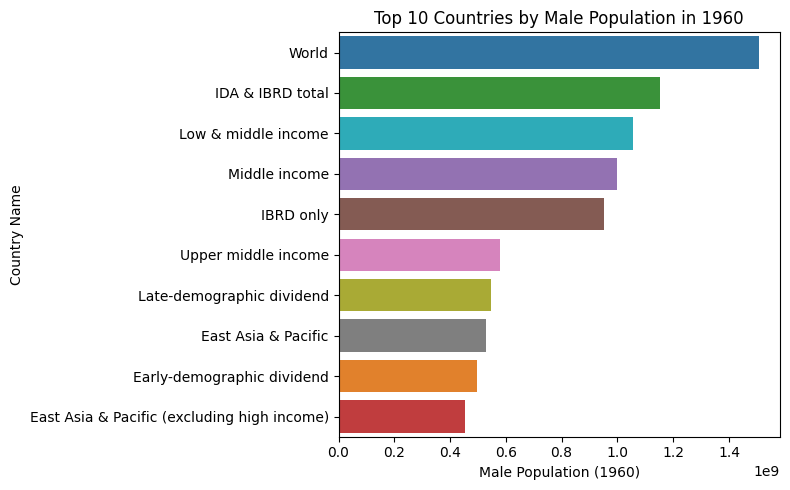

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_17036\909171416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)


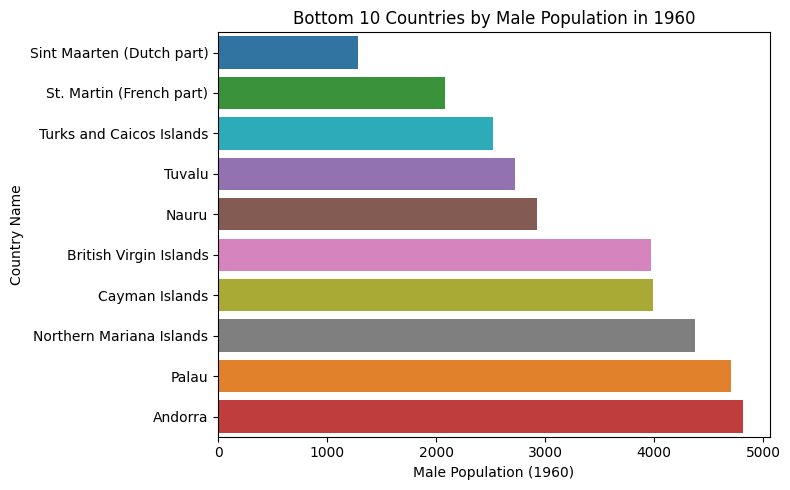

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_17036\909171416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)


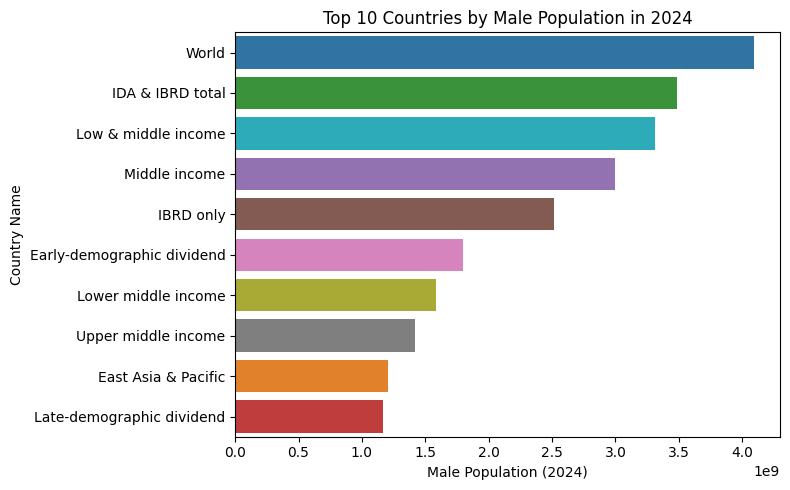

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_17036\909171416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)


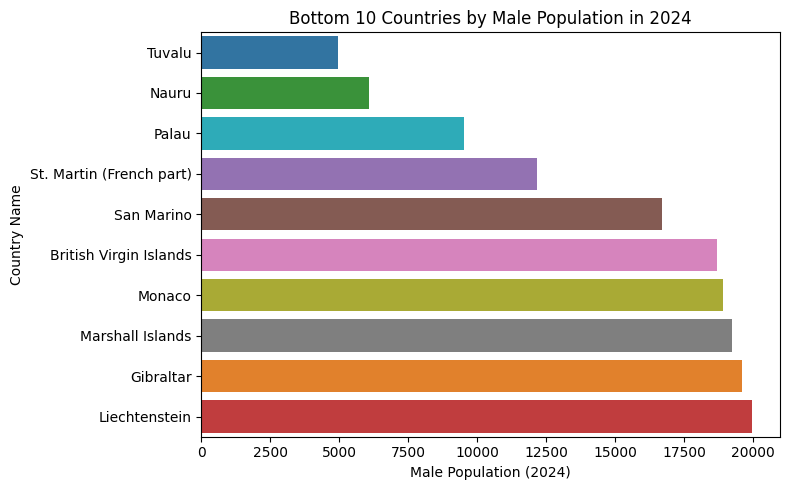

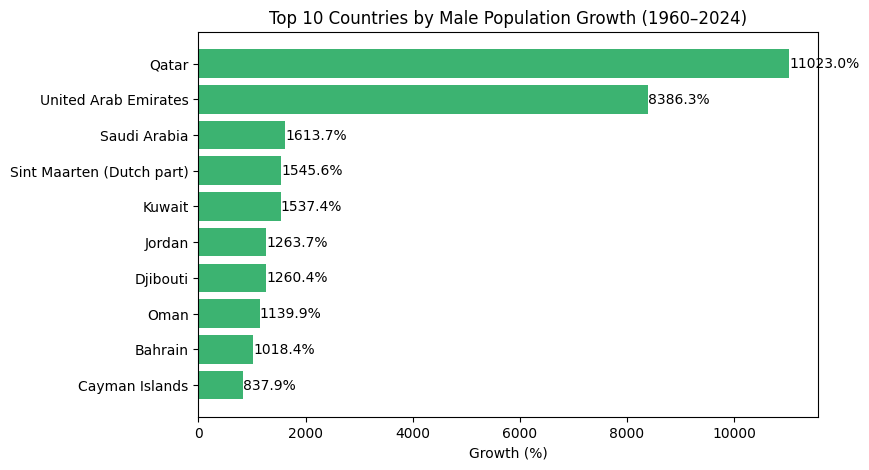

In [15]:
# MALE POPULATION PLOTS
top10_male_1960 = merged_df[['Country Name', 'Male_1960']].dropna().sort_values(by='Male_1960', ascending=False).head(10)
bottom10_male_1960 = merged_df[['Country Name', 'Male_1960']].dropna().sort_values(by='Male_1960', ascending=True).head(10)
top10_male_2024 = merged_df[['Country Name', 'Male_2024']].dropna().sort_values(by='Male_2024', ascending=False).head(10)
bottom10_male_2024 = merged_df[['Country Name', 'Male_2024']].dropna().sort_values(by='Male_2024', ascending=True).head(10)

plot_histogram(top10_male_1960, "Male_1960", "Top 10 Countries by Male Population in 1960", "Male Population (1960)")
plot_histogram(bottom10_male_1960, "Male_1960", "Bottom 10 Countries by Male Population in 1960", "Male Population (1960)")
plot_histogram(top10_male_2024, "Male_2024", "Top 10 Countries by Male Population in 2024", "Male Population (2024)")
plot_histogram(bottom10_male_2024, "Male_2024", "Bottom 10 Countries by Male Population in 2024", "Male Population (2024)")
plot_top_growth(male_pop_growth, 'Male Population')

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_17036\909171416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)


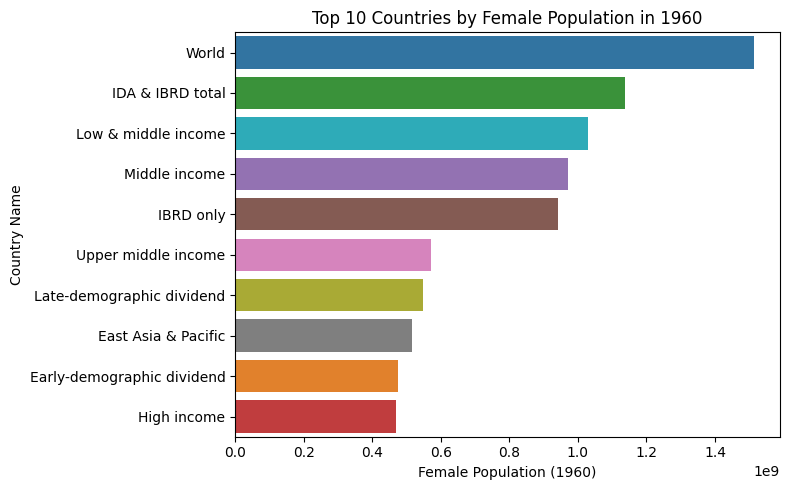

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_17036\909171416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)


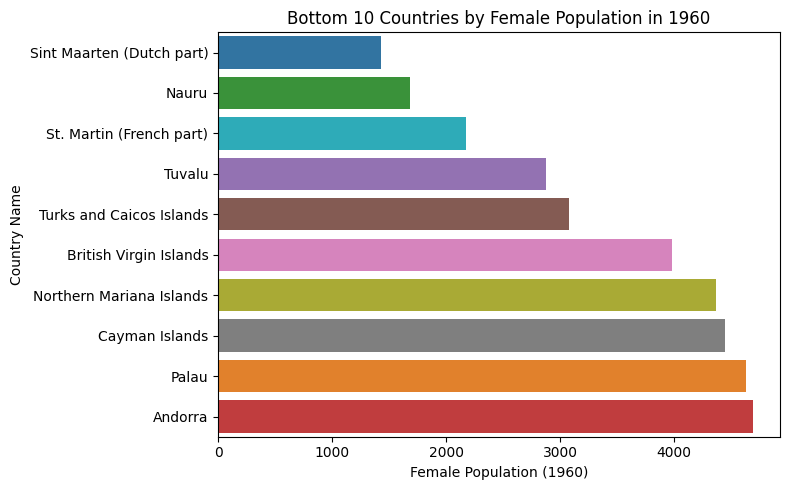

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_17036\909171416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)


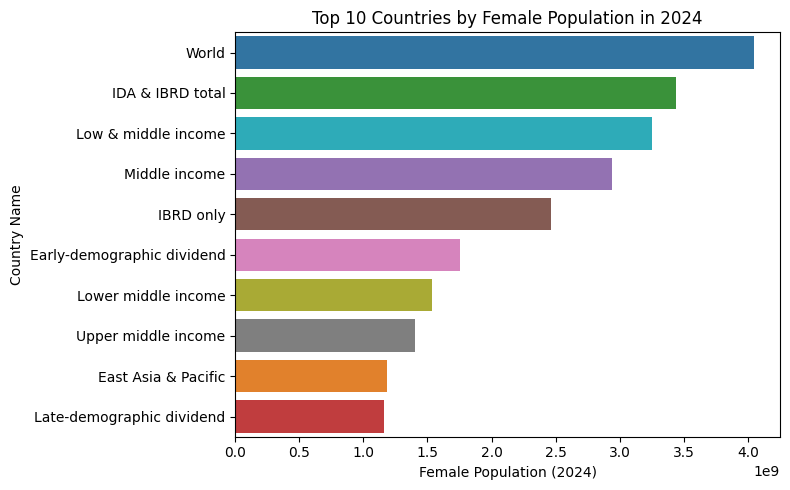

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_17036\909171416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y="Country Name", data=data, palette=custom_palette)


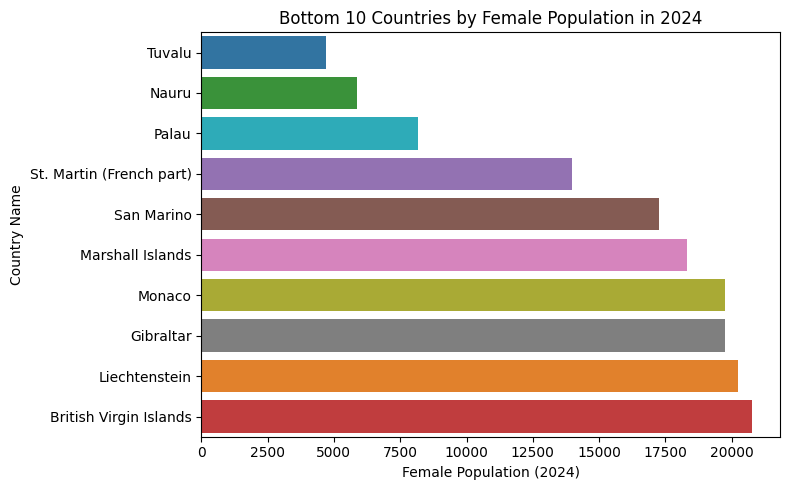

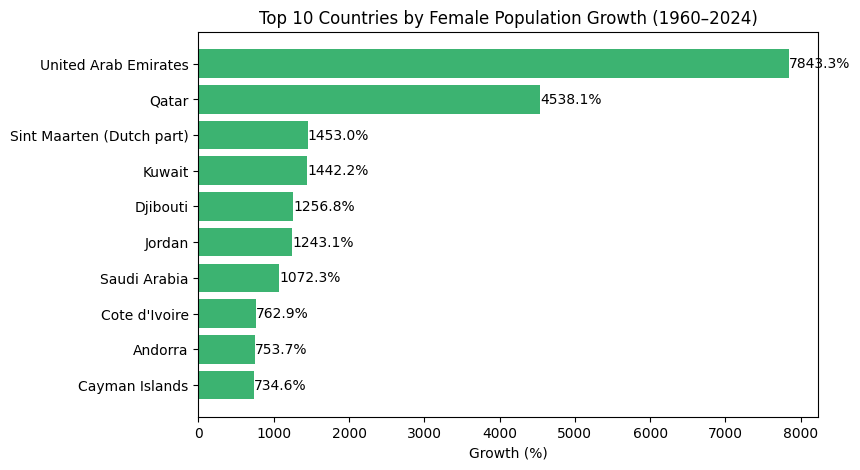

In [16]:
# FEMALE POPULATION PLOTS
top10_female_1960 = merged_df[['Country Name', 'Female_1960']].dropna().sort_values(by='Female_1960', ascending=False).head(10)
bottom10_female_1960 = merged_df[['Country Name', 'Female_1960']].dropna().sort_values(by='Female_1960', ascending=True).head(10)
top10_female_2024 = merged_df[['Country Name', 'Female_2024']].dropna().sort_values(by='Female_2024', ascending=False).head(10)
bottom10_female_2024 = merged_df[['Country Name', 'Female_2024']].dropna().sort_values(by='Female_2024', ascending=True).head(10)

plot_histogram(top10_female_1960, "Female_1960", "Top 10 Countries by Female Population in 1960", "Female Population (1960)")
plot_histogram(bottom10_female_1960, "Female_1960", "Bottom 10 Countries by Female Population in 1960", "Female Population (1960)")
plot_histogram(top10_female_2024, "Female_2024", "Top 10 Countries by Female Population in 2024", "Female Population (2024)")
plot_histogram(bottom10_female_2024, "Female_2024", "Bottom 10 Countries by Female Population in 2024", "Female Population (2024)")
plot_top_growth(female_pop_growth, 'Female Population')

In [17]:
# DISPLAY TABLES
print("\nTop 10 Total Population (1960):\n", top10_total_1960)
print("\nBottom 10 Total Population (1960):\n", bottom10_total_1960)
print("\nTop 10 Total Population (2024):\n", top10_total_2024)
print("\nBottom 10 Total Population (2024):\n", bottom10_total_2024)
print("\nTop 10 Male Population (1960):\n", top10_male_1960)
print("\nBottom 10 Male Population (1960):\n", bottom10_male_1960)
print("\nTop 10 Male Population (2024):\n", top10_male_2024)
print("\nBottom 10 Male Population (2024):\n", bottom10_male_2024)
print("\nTop 10 Female Population (1960):\n", top10_female_1960)
print("\nBottom 10 Female Population (1960):\n", bottom10_female_1960)
print("\ntop 10 Female Population (2024):\n", top10_female_2024)
print("\nBottom 10 Female Population (2024):\n", bottom10_female_2024)


Top 10 Total Population (1960):
                    Country Name    Total_1960
259                       World  3.021513e+09
103            IDA & IBRD total  2.289192e+09
140         Low & middle income  2.083719e+09
156               Middle income  1.968969e+09
102                   IBRD only  1.893705e+09
249         Upper middle income  1.149653e+09
142   Late-demographic dividend  1.094884e+09
63          East Asia & Pacific  1.042819e+09
62   Early-demographic dividend  9.689094e+08
95                  High income  9.082573e+08

Bottom 10 Total Population (1960):
                   Country Name  Total_1960
225  Sint Maarten (Dutch part)      2715.0
147   St. Martin (French part)      4250.0
179                      Nauru      4607.0
245                     Tuvalu      5598.0
228   Turks and Caicos Islands      5599.0
255     British Virgin Islands      7950.0
52              Cayman Islands      8428.0
164   Northern Mariana Islands      8736.0
188                      Palau      